<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio Clustering


### Contexto del Problema

Eres un científico de datos contratado por una federación deportiva internacional que desea mejorar sus programas de entrenamiento personalizados. La federación maneja una gran variedad de atletas que participan en diferentes disciplinas deportivas, y cada uno tiene necesidades de entrenamiento y desarrollo únicas. Para maximizar el rendimiento y mejorar la efectividad de los programas de entrenamiento, la federación quiere segmentar a sus atletas en grupos homogéneos basados en sus características físicas, habilidades y comportamientos de entrenamiento.


### Los datos

- **name**: Nombre del atleta. Es una variable categórica que identifica a cada atleta de manera única.

- **gender**: Género del atleta. Es una variable categórica que indica si el atleta es masculino ("Male") o femenino ("Female").

- **age**: Edad del atleta. Es una variable numérica que representa la edad del atleta en años.

- **height**: Altura del atleta. Es una variable numérica que representa la altura del atleta en centímetros.

- **nationality**: Nacionalidad del atleta. Es una variable categórica que indica el país de origen del atleta.

- **weight**: Peso del atleta. Es una variable numérica que representa el peso del atleta en kilogramos.

- **sports**: Deportes que practica el atleta. Es una variable categórica que puede contener múltiples valores (deportes) separados por comas.

- **hours_per_day**: Horas de entrenamiento por día. Es una variable numérica que indica el número promedio de horas que el atleta entrena cada día.

- **strength**: Fuerza del atleta. Es una variable numérica que representa la evaluación de la fuerza del atleta en una escala (por ejemplo, de 1 a 10).

- **agility**: Agilidad del atleta. Es una variable numérica que representa la evaluación de la agilidad del atleta en una escala (por ejemplo, de 1 a 10).

- **mental**: Capacidad mental del atleta. Es una variable numérica que representa la evaluación de la capacidad mental del atleta en una escala (por ejemplo, de 1 a 10).

- **federation**: Federación a la que pertenece el atleta. Es una variable categórica que indica la organización deportiva a la que está afiliado el atleta.

- **year_start**: Año de inicio. Es una variable numérica que indica el año en que el atleta comenzó su carrera o se unió a la federación.

- **rank**: Rango del atleta. Es una variable numérica que representa la posición o clasificación del atleta en su disciplina o federación.


### Objetivo del Ejercicio

El objetivo principal de este ejercicio es que los alumnos practiquen y desarrollen habilidades en el análisis de datos, preprocesamiento y técnicas de clustering aplicadas a un problema real en el ámbito deportivo. Al completar este ejercicio, los alumnos deberán ser capaces de:

1. **Realizar un Análisis Exploratorio de Datos (EDA)**:
    - Comprender la estructura y distribución de los datos.
    - Identificar patrones y relaciones significativas entre las variables.
    - Manejar valores faltantes y atípicos de manera efectiva.
    - Visualizar las características más relevantes.

2. **Preprocesar los Datos de Manera Adecuada**:
    - Convertir variables categóricas en variables numéricas.
    - Escalar las variables numéricas para asegurar una contribución equitativa al análisis de clustering.
    - Seleccionar las características más relevantes que contribuirán al análisis de clustering.

3. **Aplicar Técnicas de Clustering para Segmentar a los Atletas**:
    - Probar diferentes métodos de clustering (e.g., K-means, DBSCAN, Hierarchical Clustering) para identificar el más adecuado para los datos proporcionados.
    - Determinar el número óptimo de clusters utilizando métodos como el codo (Elbow Method) o la silueta (Silhouette Score).
    - Visualizar los clusters obtenidos y analizar sus características distintivas.

4. **Extraer Conclusiones y Proporcionar Recomendaciones de Entrenamiento**:
    - Describir las características principales de cada cluster identificado.
    - Proporcionar recomendaciones prácticas y accionables para personalizar los programas de entrenamiento para cada grupo de atletas.
¡

In [196]:
# Para no tener que reiniciar el kernel
%load_ext autoreload
%autoreload 2

# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

import math

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
import plotly  as px


# Para el modelado de los datos
# -----------------------------------------------------------------------
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Preprocesado y modelado
# -----------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler


# Sacar número de clusters y métricas
# -----------------------------------------------------------------------
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

# Modelos de clustering
# -----------------------------------------------------------------------
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering

# Para visualizar los dendrogramas
# -----------------------------------------------------------------------
import scipy.cluster.hierarchy as sch
# Configuración warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [197]:
import sys
import os
sys.path.append(os.path.abspath('../'))

In [198]:
# Insertamos los soportes de nuestro src
from src import soporte_preprocesamiento as sp
from src import soporte_encoding as se
from src import soporte_logistica_preprocesamiento as slp
from src import soporte_outliers as so

In [199]:
# Instrucción para visualizar todas las columnas de un dataFrame
pd.set_option('display.max_columns', None)

In [200]:
df = pd.read_csv('datos/WrestlingWorldTournament.csv',index_col=0)

In [201]:
df.head()

,name,gender,age,height,nationality,weight,sports,hours_per_day,strength,agility,mental,federation,year_start,rank
0,Aaron Peavy,Female,41,165.0,England,82,"Boxing, MMA",3,7,8,7,Fight Zone Wrestling,1989,42
1,Abe Rutland,Male,36,185.0,Japan,100,Judo,0,8,5,9,World Wrestling Entertainment,2006,161
2,Adrian Quinn,Male,29,178.5,Japan,93,Karate,4,8,8,7,World Wrestling Entertainment,2012,153
3,Alan Beckham,Male,39,187.5,Japan,107,Judo,3,7,6,8,Fight Zone Wrestling,2003,252
4,Albertha Rodriguez,Female,29,158.0,USA,72,MMA,1,5,7,7,Consejo Global de Lucha Libre,2012,360


In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           500 non-null    object 
 1   gender         500 non-null    object 
 2   age            500 non-null    int64  
 3   height         500 non-null    float64
 4   nationality    500 non-null    object 
 5   weight         500 non-null    int64  
 6   sports         500 non-null    object 
 7   hours_per_day  500 non-null    int64  
 8   strength       500 non-null    int64  
 9   agility        500 non-null    int64  
 10  mental         500 non-null    int64  
 11  federation     500 non-null    object 
 12  year_start     500 non-null    int64  
 13  rank           500 non-null    int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 58.6+ KB


In [203]:
sp.exploracion_datos(df)

El número de filas es 500 y el número de columnas es 14

----------

En este conjunto de datos tenemos 0 valores duplicados

----------

Los columnas con valores nulos y sus porcentajes son: 


Series([], dtype: float64)


----------

Las principales estadísticas de las variables númericas son:


,count,mean,std,min,25%,50%,75%,max
age,500.0,31.154,5.438514,18.0,27.00,31.0,35.000,53.0
height,500.0,174.864,9.468623,152.0,167.50,174.0,181.625,202.0
weight,500.0,89.688,11.081889,65.0,81.00,89.0,98.000,123.0
hours_per_day,500.0,3.064,1.375386,0.0,2.00,3.0,4.000,8.0
strength,500.0,6.152,1.567741,2.0,5.00,6.0,7.000,10.0
agility,500.0,7.148,1.455449,3.0,6.00,7.0,8.000,10.0
mental,500.0,6.732,1.197934,3.0,6.00,7.0,8.000,10.0
year_start,500.0,2007.130,6.325910,1986.0,2003.00,2007.0,2011.000,2021.0
rank,500.0,250.500,144.481833,1.0,125.75,250.5,375.250,500.0



----------

Las principales estadísticas de las variables categóricas son:


,count,unique,top,freq
name,500,500,Zenaida Flagge,1
gender,500,2,Female,265
nationality,500,8,France,118
sports,500,31,Karate,42
federation,500,3,Fight Zone Wrestling,206



----------

Las características principales del dataframe son:
<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           500 non-null    object 
 1   gender         500 non-null    object 
 2   age            500 non-null    int64  
 3   height         500 non-null    float64
 4   nationality    500 non-null    object 
 5   weight         500 non-null    int64  
 6   sports         500 non-null    object 
 7   hours_per_day  500 non-null    int64  
 8   strength       500 non-null    int64  
 9   agility        500 non-null    int64  
 10  mental         500 non-null    int64  
 11  federation     500 non-null    object 
 12  year_start     500 non-null    int64  
 13  rank           500 non-null    int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 58.6+ KB


None

In [204]:
visualizador = sp.Visualizador(df)

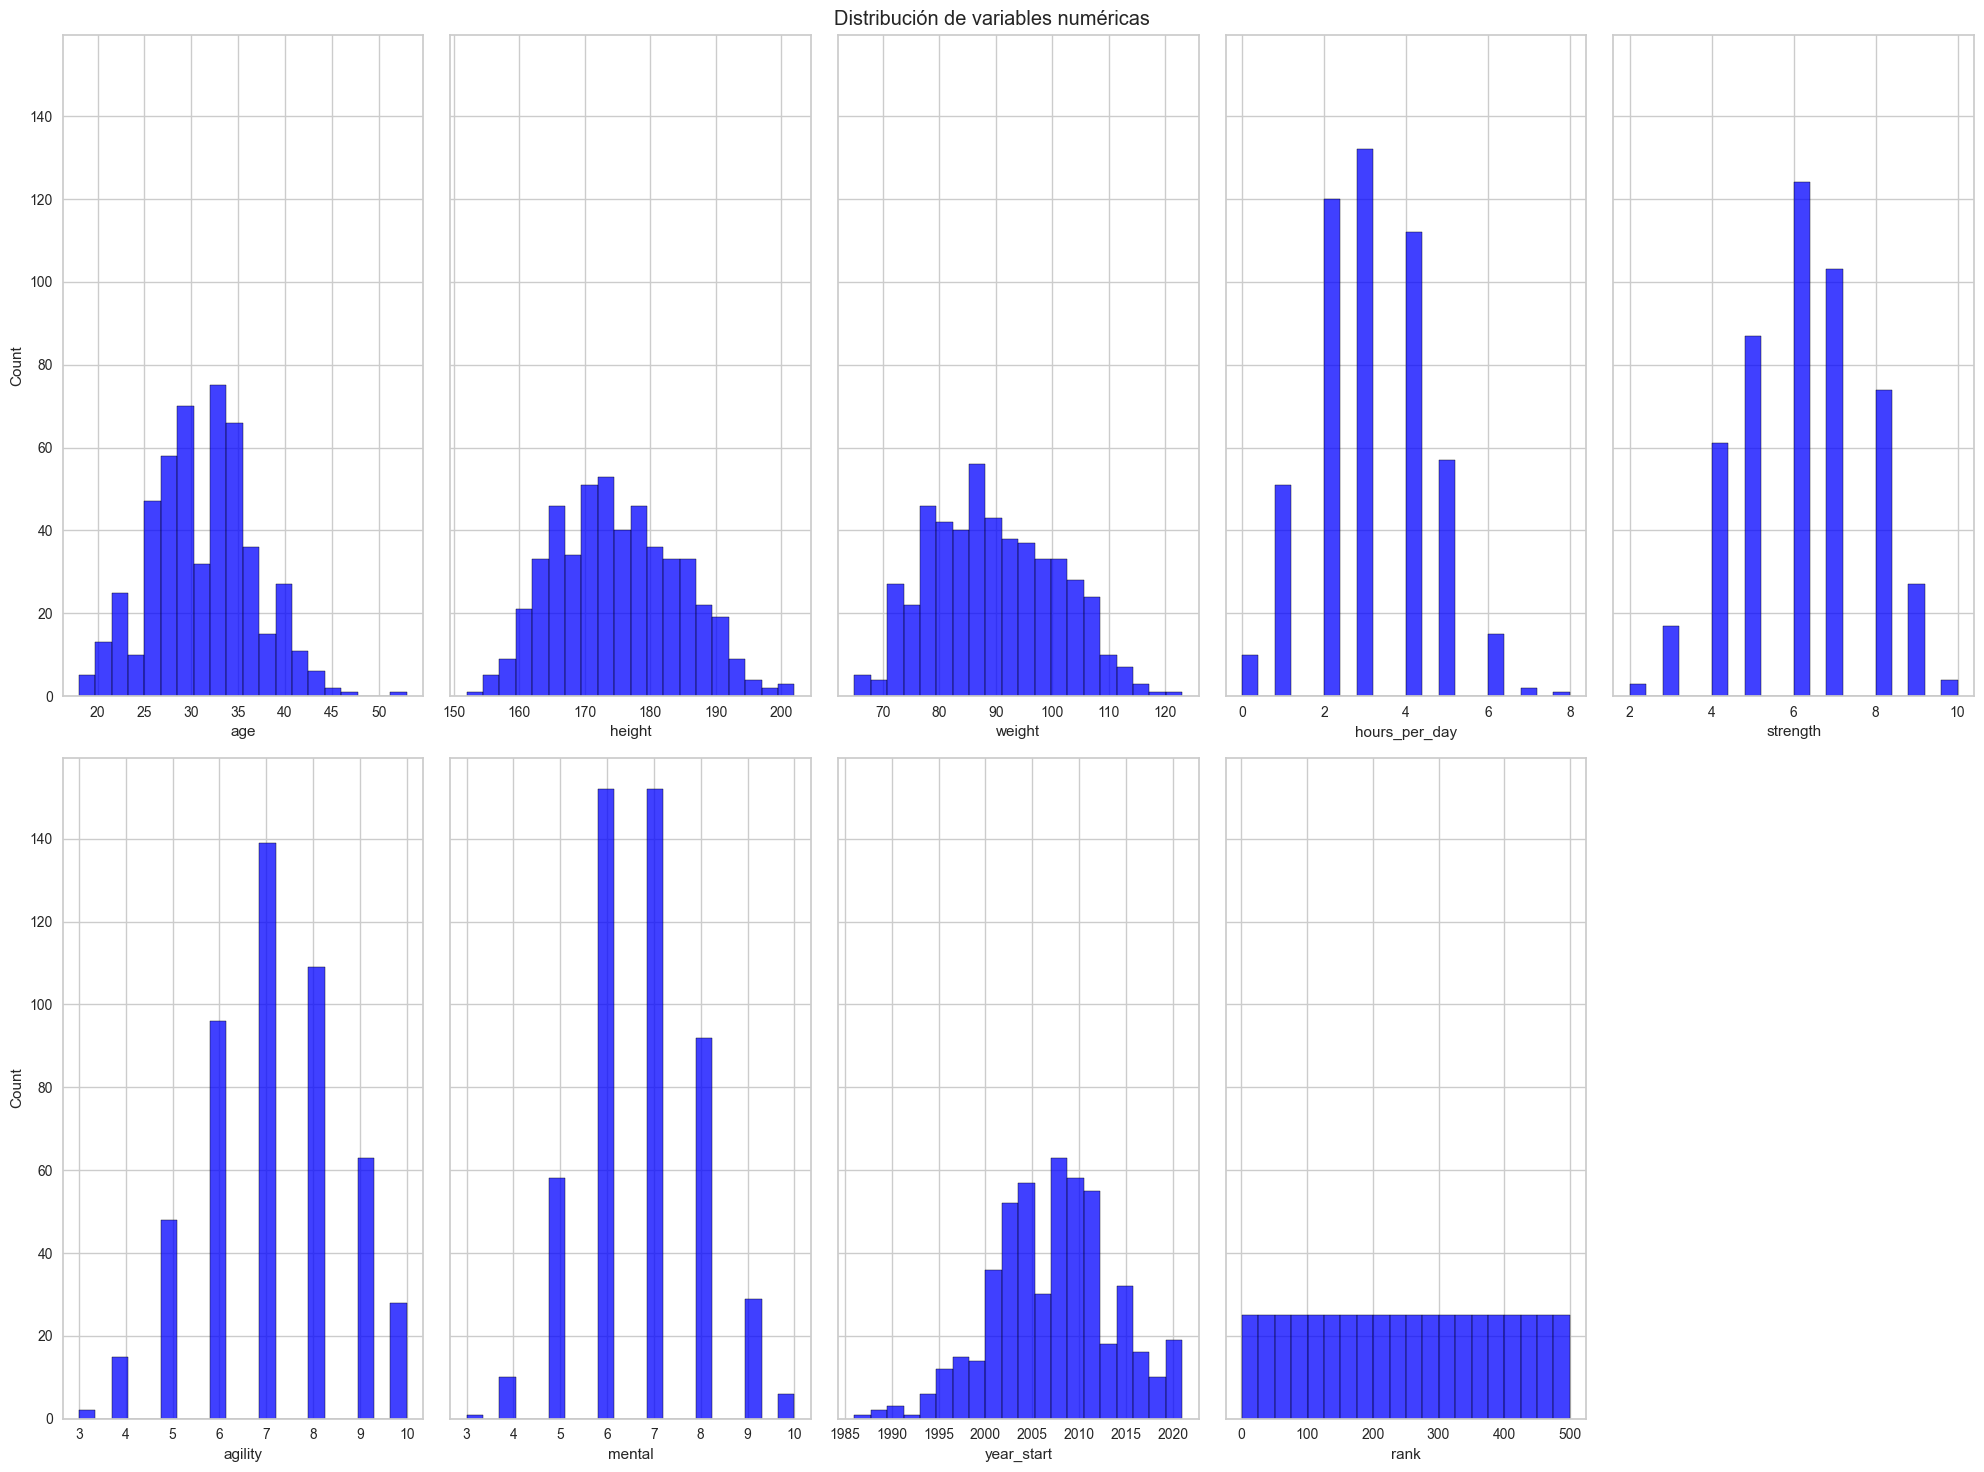

In [205]:
visualizador.plot_numericas(color="blue", tamano_grafica=(20, 15))

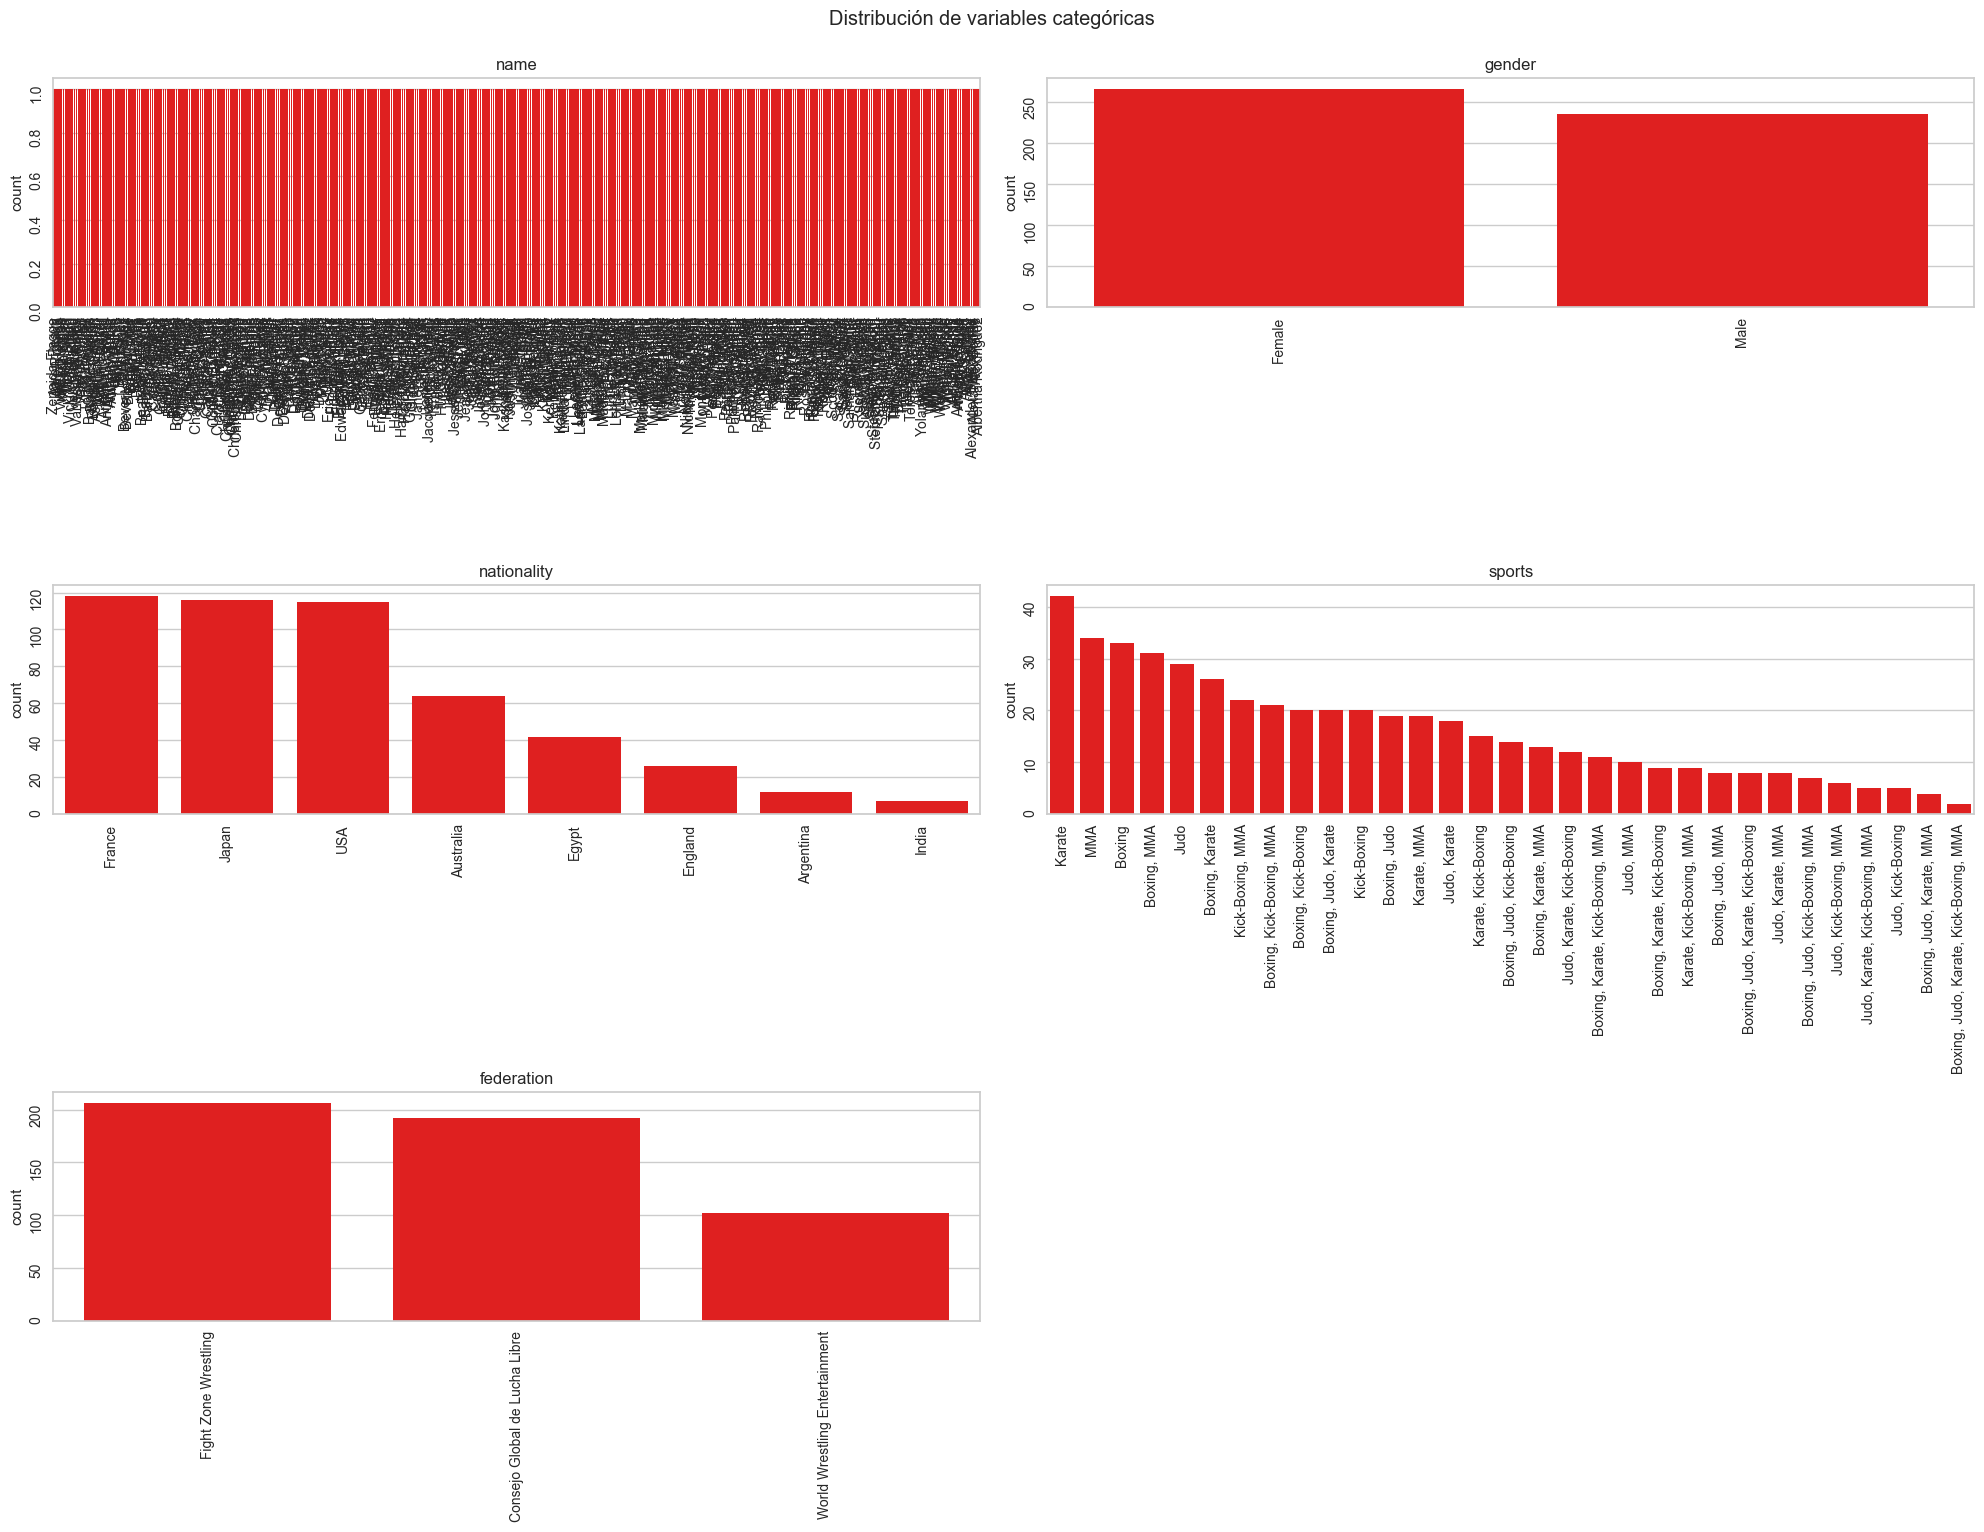

In [206]:
visualizador.plot_categoricas(color="red", tamano_grafica=(20, 15))

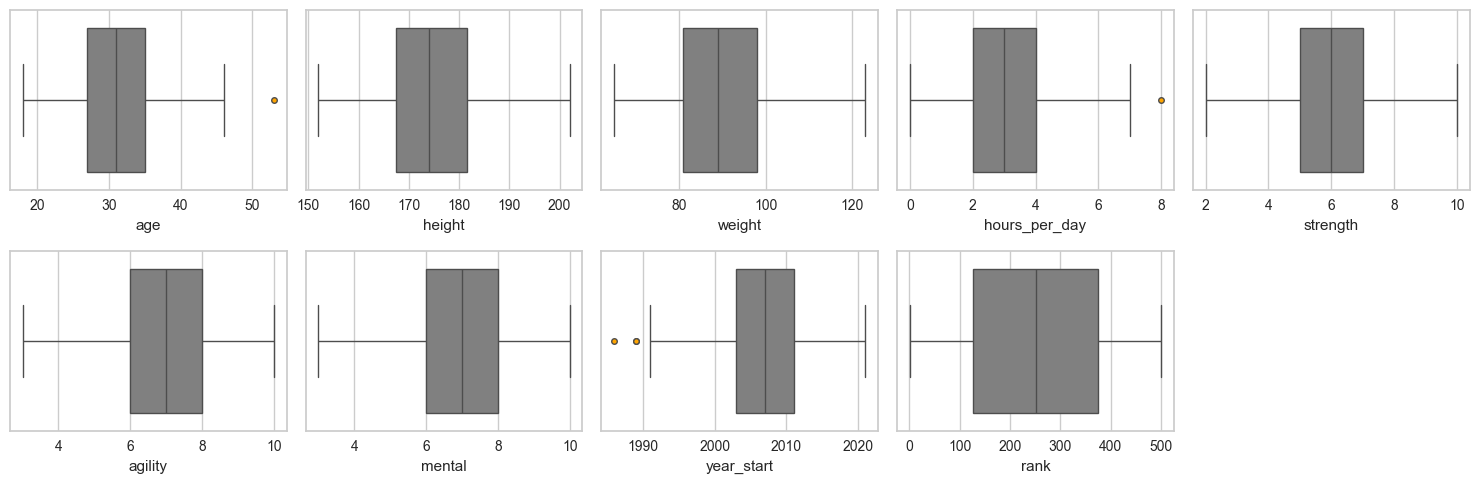

In [207]:
visualizador.deteccion_outliers()

Hay muy pocos outliers, a vista de la grafica los estudiamos más de cerca

In [208]:
so.describe_outliers(df)

,columna,n_outliers,limite_inf,limite_sup,%_outliers
7,year_start,3,1991.0000,2023.0000,0.6
0,age,1,15.0000,47.0000,0.2
3,hours_per_day,1,-1.0000,7.0000,0.2
2,weight,0,55.5000,123.5000,0.0
1,height,0,146.3125,202.8125,0.0
4,strength,0,2.0000,10.0000,0.0
5,agility,0,3.0000,11.0000,0.0
6,mental,0,3.0000,11.0000,0.0
8,rank,0,-248.5000,749.5000,0.0


no llegamos al 1 por ciento de outlers en ninguna columna, así que los dejamos tal cual están, sin eliminarlos ni imputarlos

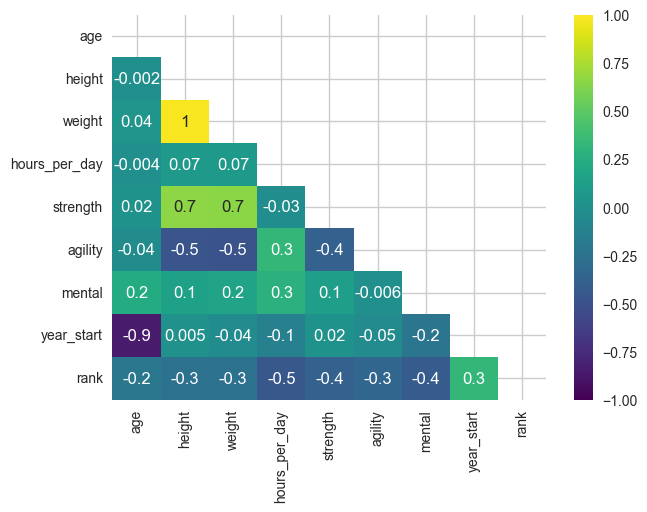

In [209]:
visualizador.correlacion(tamano_grafica = (7, 5))


In [210]:
df["height"].info()

<class 'pandas.core.series.Series'>
Index: 500 entries, 0 to 499
Series name: height
Non-Null Count  Dtype  
--------------  -----  
500 non-null    float64
dtypes: float64(1)
memory usage: 7.8 KB


In [211]:
df["weight"].info()

<class 'pandas.core.series.Series'>
Index: 500 entries, 0 to 499
Series name: weight
Non-Null Count  Dtype
--------------  -----
500 non-null    int64
dtypes: int64(1)
memory usage: 7.8 KB


height y weight tienen correlación de 1. Nos quedamos con height, pq el tipo float nos es más comodo para encoding y otras transformaciones. Eliminamos también name que es irrelevante para el análisis


In [212]:
df.drop(columns=["weight", "name"], inplace=True)

In [213]:
# Identificar variables categóricas y numéricas
categorical_columns = ["gender", "nationality", "sports", "federation"]
numerical_columns = [col for col in df.columns if col not in categorical_columns]

# Revisar categorías únicas de las columnas categóricas
categories_summary = {col: df[col].nunique() for col in categorical_columns}

# Visualizar resumen de categorías
categories_summary

{'gender': 2, 'nationality': 8, 'sports': 31, 'federation': 3}

In [214]:
# Codificación de la variable 'gender' (0 para Female, 1 para Male)
df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})

# Codificación one-hot para las otras variables categóricas
df_encoded = pd.get_dummies(df, columns=["nationality", "sports", "federation"], drop_first=True)

# Resumen de las columnas después de la codificación
df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 48 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   gender                                         500 non-null    int64  
 1   age                                            500 non-null    int64  
 2   height                                         500 non-null    float64
 3   hours_per_day                                  500 non-null    int64  
 4   strength                                       500 non-null    int64  
 5   agility                                        500 non-null    int64  
 6   mental                                         500 non-null    int64  
 7   year_start                                     500 non-null    int64  
 8   rank                                           500 non-null    int64  
 9   nationality_Australia                          500 non-null

In [215]:
# Análisis de las distribuciones de las columnas numéricas
numerical_stats = df_encoded[numerical_columns].describe()
numerical_stats


,age,height,hours_per_day,strength,agility,mental,year_start,rank
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000
mean,31.154000,174.864000,3.064000,6.152000,7.148000,6.732000,2007.13000,250.500000
std,5.438514,9.468623,1.375386,1.567741,1.455449,1.197934,6.32591,144.481833
min,18.000000,152.000000,0.000000,2.000000,3.000000,3.000000,1986.00000,1.000000
25%,27.000000,167.500000,2.000000,5.000000,6.000000,6.000000,2003.00000,125.750000
50%,31.000000,174.000000,3.000000,6.000000,7.000000,7.000000,2007.00000,250.500000
75%,35.000000,181.625000,4.000000,7.000000,8.000000,8.000000,2011.00000,375.250000
max,53.000000,202.000000,8.000000,10.000000,10.000000,10.000000,2021.00000,500.000000


Usamos ahora el metodo del codo para determinar el número de clusters optimo

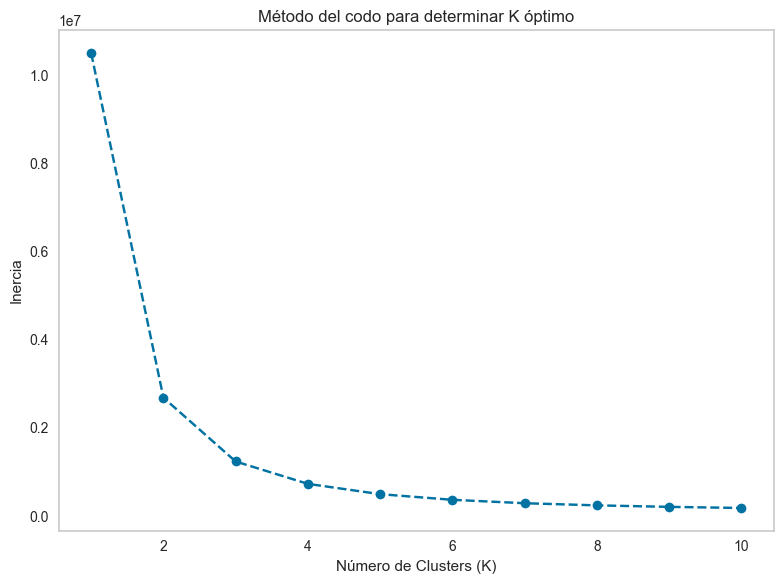

In [216]:
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_encoded)
    inertia.append(kmeans.inertia_)

# Gráfica del método del codo
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.title('Método del codo para determinar K óptimo')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia')
plt.grid()
plt.tight_layout()
plt.show()


In [217]:
# Basándonos en el método del codo, seleccionamos el número óptimo de clusters (por ejemplo, 4)
optimal_clusters = 4

# Aplicar K-Means con el número óptimo de clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df_encoded['Cluster'] = kmeans.fit_predict(df_encoded)

cluster_summary = df_encoded['Cluster'].value_counts()

cluster_summary


Cluster
1    127
2    125
3    124
0    124
Name: count, dtype: int64

Analizamos las características principales de cada cluster para interpretarlos.

In [219]:
# Calcular estadísticas descriptivas por cluster
cluster_analysis = df_encoded.groupby('Cluster').mean()
cluster_analysis.reset_index()

,Cluster,gender,age,height,hours_per_day,strength,agility,mental,year_start,rank,nationality_Australia,nationality_Egypt,nationality_England,nationality_France,nationality_India,nationality_Japan,nationality_USA,"sports_Boxing, Judo","sports_Boxing, Judo, Karate","sports_Boxing, Judo, Karate, Kick-Boxing","sports_Boxing, Judo, Karate, Kick-Boxing, MMA","sports_Boxing, Judo, Karate, MMA","sports_Boxing, Judo, Kick-Boxing","sports_Boxing, Judo, Kick-Boxing, MMA","sports_Boxing, Judo, MMA","sports_Boxing, Karate","sports_Boxing, Karate, Kick-Boxing","sports_Boxing, Karate, Kick-Boxing, MMA","sports_Boxing, Karate, MMA","sports_Boxing, Kick-Boxing","sports_Boxing, Kick-Boxing, MMA","sports_Boxing, MMA",sports_Judo,"sports_Judo, Karate","sports_Judo, Karate, Kick-Boxing","sports_Judo, Karate, Kick-Boxing, MMA","sports_Judo, Karate, MMA","sports_Judo, Kick-Boxing","sports_Judo, Kick-Boxing, MMA","sports_Judo, MMA",sports_Karate,"sports_Karate, Kick-Boxing","sports_Karate, Kick-Boxing, MMA","sports_Karate, MMA",sports_Kick-Boxing,"sports_Kick-Boxing, MMA",sports_MMA,federation_Fight Zone Wrestling,federation_World Wrestling Entertainment
0,0,0.645161,33.120968,177.157258,4.112903,6.733871,7.895161,7.395161,2003.701613,62.5,0.145161,0.120968,0.064516,0.266129,0.016129,0.129032,0.250000,0.000000,0.008065,0.040323,0.016129,0.032258,0.016129,0.048387,0.048387,0.008065,0.008065,0.080645,0.064516,0.024194,0.145161,0.096774,0.000000,0.016129,0.008065,0.040323,0.040323,0.000000,0.024194,0.048387,0.008065,0.008065,0.040323,0.008065,0.008065,0.072581,0.032258,0.427419,0.241935
1,1,0.259843,29.748031,171.145669,2.338583,5.244094,6.590551,6.055118,2009.606299,437.0,0.125984,0.062992,0.039370,0.204724,0.015748,0.275591,0.244094,0.055118,0.031496,0.000000,0.000000,0.000000,0.007874,0.000000,0.000000,0.078740,0.023622,0.000000,0.007874,0.062992,0.000000,0.023622,0.110236,0.055118,0.015748,0.000000,0.000000,0.015748,0.000000,0.000000,0.188976,0.039370,0.000000,0.000000,0.062992,0.015748,0.031496,0.425197,0.133858
2,2,0.432000,30.944000,174.616000,2.840000,6.056000,6.864000,6.592000,2007.560000,311.0,0.120000,0.112000,0.032000,0.248000,0.016000,0.240000,0.216000,0.072000,0.056000,0.008000,0.000000,0.000000,0.032000,0.000000,0.008000,0.072000,0.016000,0.000000,0.016000,0.040000,0.008000,0.032000,0.104000,0.040000,0.024000,0.000000,0.000000,0.016000,0.000000,0.008000,0.104000,0.048000,0.016000,0.064000,0.040000,0.040000,0.088000,0.416000,0.200000
3,3,0.548387,30.838710,176.629032,2.983871,6.596774,7.258065,6.903226,2007.588710,186.5,0.120968,0.040323,0.072581,0.225806,0.008065,0.282258,0.209677,0.024194,0.064516,0.016129,0.000000,0.000000,0.056452,0.008065,0.008065,0.048387,0.024194,0.008065,0.016129,0.032258,0.016129,0.096774,0.016129,0.032258,0.048387,0.000000,0.024194,0.008065,0.024194,0.024194,0.032258,0.024194,0.016129,0.080645,0.048387,0.048387,0.120968,0.379032,0.241935
